<a href="https://colab.research.google.com/github/HopeRetina/Turkish-March-Spectrogram-two-versions/blob/main/Turkish_March_Spectrograms_and_Scalograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#First install sounddevice which I will be using for loading audio files.

In [1]:
!sudo apt-get install libportaudio2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 65.4 kB of archives.
After this operation, 223 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 libportaudio2 amd64 19.6.0-1build1 [65.4 kB]
Fetched 65.4 kB in 5s (12.4 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 128208

In [2]:
!pip install sounddevice

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = [14, 10]
plt.rcParams.update({'font.size': 10})

In [4]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import librosa

from IPython.display import Audio

##Simulate a quadratic chirp

In [6]:
print(sd.query_devices())

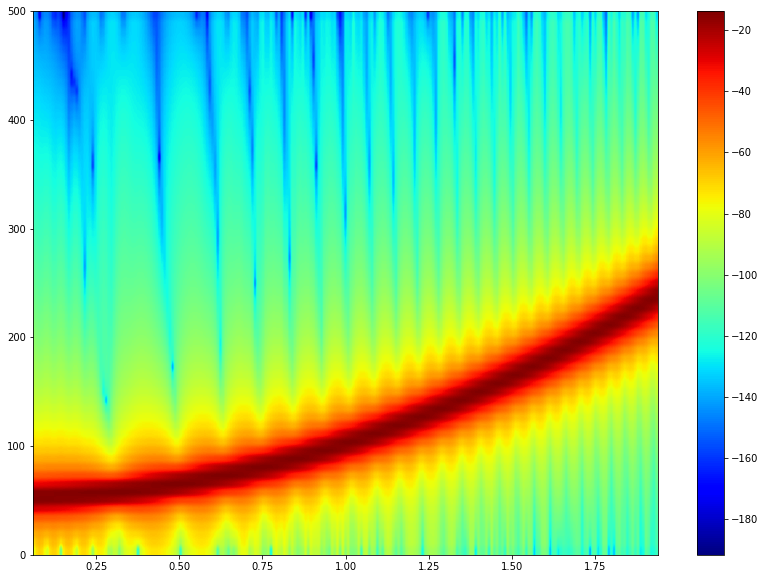

In [7]:
dt = 0.001
t = np.arange(0, 2, dt)
f0 = 50
f1 = 250
t1 = 2
x = np.cos(2*np.pi*t*(f0 + (f1-f0)*np.power(t, 2)/(3*t1**2)))

fs = 1/dt
# sd.default.device
# sd.play(2*x, fs)

# Audio(data=x, rate = fs)

plt.specgram(x, NFFT=128, Fs=1/dt, noverlap=120, cmap='jet')
plt.colorbar()
plt.show()

In [8]:
Audio(data=x*2, rate = 5500) # This sounds like a low-to-high pitch

#Now look at the spectrogram of two versions of Turkish March - one by Yujia Wang, and the other by a normal pianist, and see what patterns we get. ^_^

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
cd /content/drive/MyDrive/data_collection/

/content/drive/MyDrive/data_collection


In [11]:
filename1 = 'TM_Yujia_Wang.mp3'
filename2 = 'TM_random_pianist.mp3'

y1, sr1 = librosa.load(filename1)
y2, sr2 = librosa.load(filename2)

In [12]:
print(f'y1: {y1[:10]}')
print(f'shape of y1: {y1.shape}')
print(f'sr1: {sr1}')
print('\n')
print(f'y2: {y2[:10]}')
print(f'shape of y2: {y2.shape}')
print(f'sr2: {sr2}')

y1: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
shape of y1: (2652792,)
sr1: 22050


y2: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
shape of y2: (2844600,)
sr2: 22050


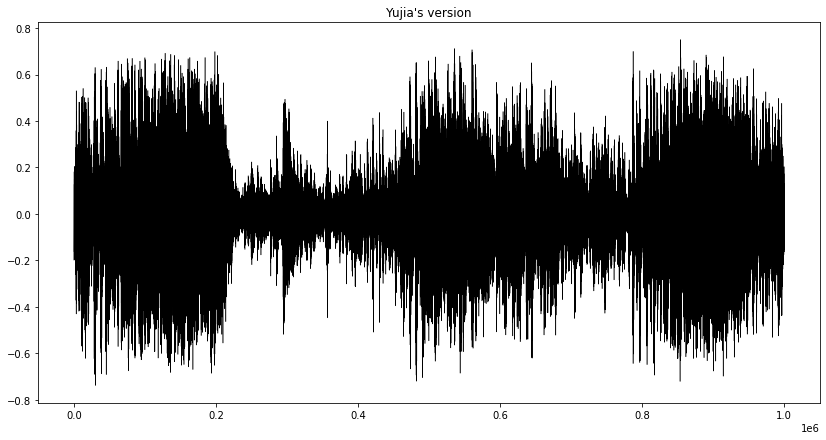

In [13]:
# Trim the files to make them shorter, and plot using pd series

y1_trim = y1[1000000:2000000]
pd.Series(y1_trim).plot(figsize=(14, 7),
                   lw=0.5,
                   title="Yujia's version",
                   color='k')
plt.show()

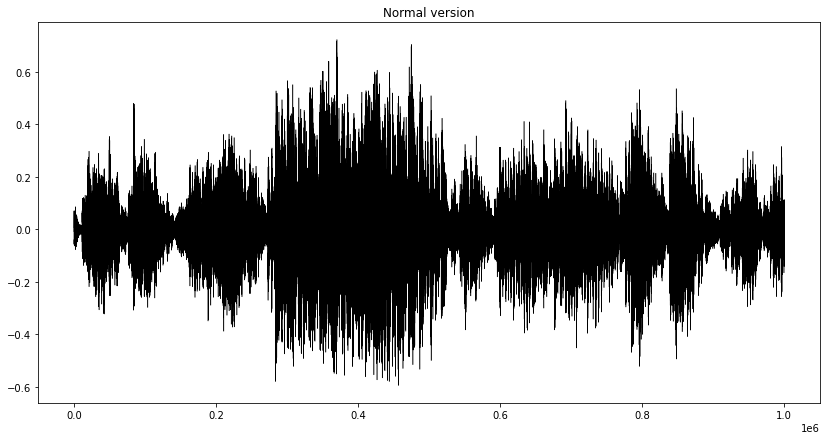

In [14]:
y2_trim = y2[1000000:2000000]
pd.Series(y2_trim).plot(figsize=(14, 7),
                   lw=0.5,
                   title="Normal version",
                   color='k')
  
plt.show()

##librosa has a builtin function to automatically trim the audio file if it cotains silence at the beginning and the end - librosa.effects.trim(), but that's not the case here so I mannually trimmed them so that the files are shorter.

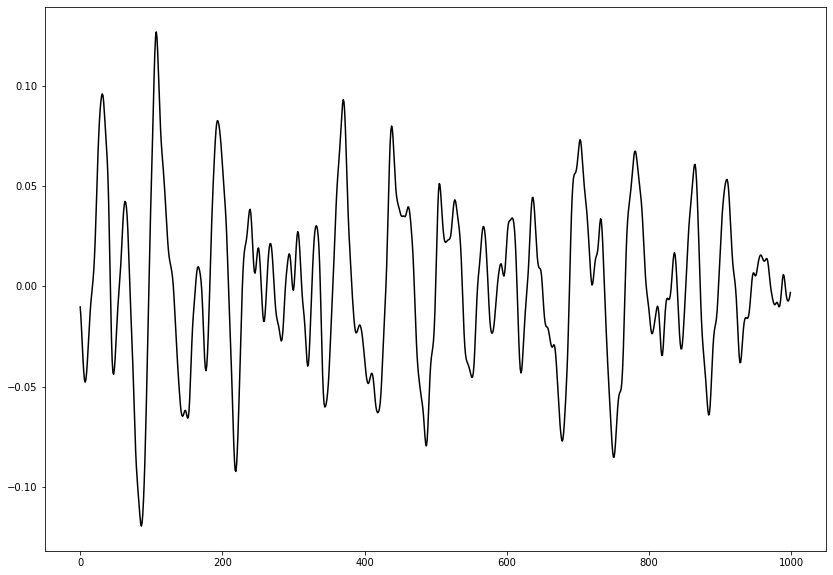

In [17]:
# Zoom in and see what the data look like

plt.plot(y2[30000:31000], 'k')
plt.show()

##Now it's time to look at the spectrogram!


---
First try short time Fourier Transform


In [18]:
# First try short time FT
D1 = librosa.stft(y1_trim)
S_db1 = librosa.amplitude_to_db(np.abs(D1), ref=np.max)
S_db1.shape

(1025, 1954)

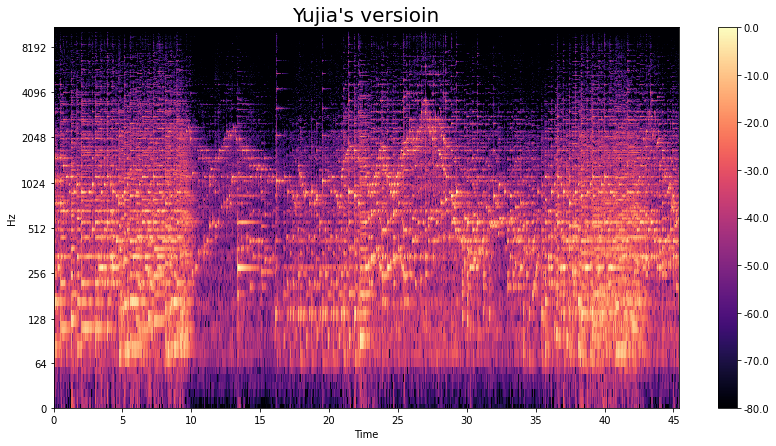

In [19]:
# Plot the transformed audio data, we need to first import librosa.display

import librosa.display
fig, ax = plt.subplots(figsize=(14, 7))
img = librosa.display.specshow(S_db1,
                               x_axis='time',
                               y_axis='log',
                               ax = ax)
ax.set_title('Yujia\'s versioin', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.1f')

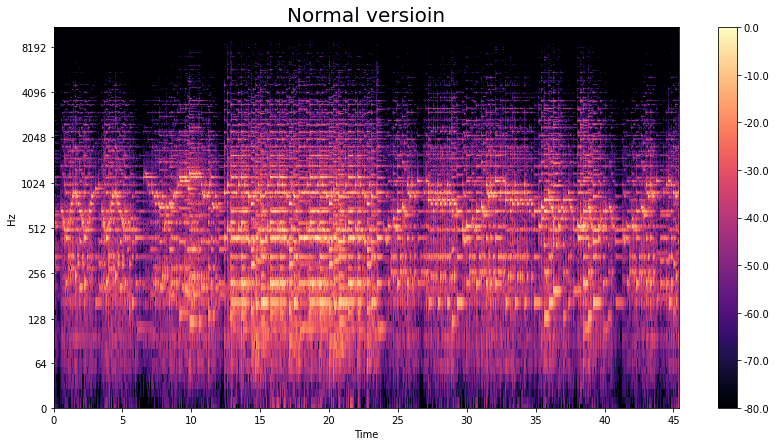

In [20]:
#Take a look at the normal version
D2 = librosa.stft(y2_trim)
S_db2 = librosa.amplitude_to_db(np.abs(D2), ref=np.max)

fig, ax = plt.subplots(figsize=(14, 7))
img = librosa.display.specshow(S_db2,
                               x_axis='time',
                               y_axis='log',
                               ax = ax)
ax.set_title('Normal versioin', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.1f')

##Mel spectrogram

In [21]:
S1 = librosa.feature.melspectrogram(y=y1_trim,
                                    sr=sr1,
                                    n_mels=128,
                                    )
S_db1_mel = librosa.amplitude_to_db(S1, ref=np.max)

In [22]:
S2 = librosa.feature.melspectrogram(y=y2_trim,
                                    sr=sr2,
                                    n_mels=128,)
S_db2_mel = librosa.amplitude_to_db(S2, ref=np.max)

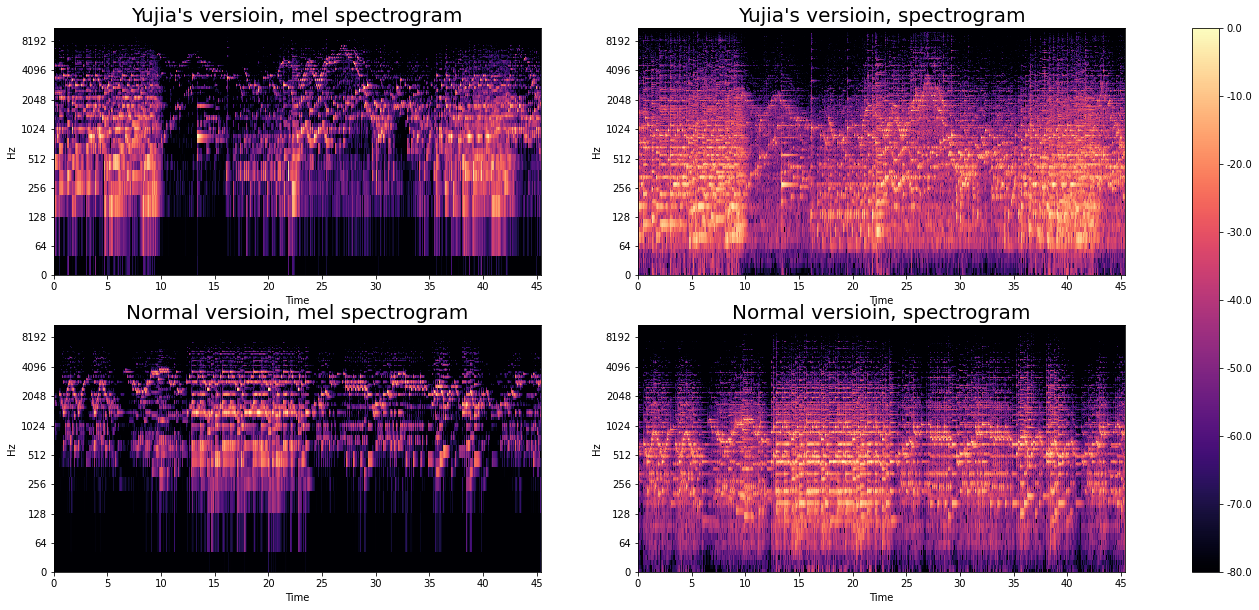

In [23]:
# Plot them side by side
fig, ax = plt.subplots(2, 2, figsize=(24, 10))

img1 = librosa.display.specshow(S_db1_mel,
                               x_axis='time',
                               y_axis='log',
                               ax = ax[0, 0])

img2 = librosa.display.specshow(S_db1,
                               x_axis='time',
                               y_axis='log',
                               ax = ax[0, 1])

img3 = librosa.display.specshow(S_db2_mel,
                               x_axis='time',
                               y_axis='log',
                               ax = ax[1, 0])

img4 = librosa.display.specshow(S_db2,
                               x_axis='time',
                               y_axis='log',
                               ax = ax[1, 1])

ax[0, 0].set_title('Yujia\'s versioin, mel spectrogram', fontsize=20)
ax[0, 1].set_title('Yujia\'s versioin, spectrogram', fontsize=20)
ax[1, 0].set_title('Normal versioin, mel spectrogram', fontsize=20)
ax[1, 1].set_title('Normal versioin, spectrogram', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.1f')

plt.show()

##Yujia's version obviously is a lot richer at the lower frequencies, and more sophisticated, compared to the other one, which has a clear pattern. But these are only parts of the pieces, and they're not temporarily well aligned, so I might have missed the rich parts in the normal version. Now look at the entire piece.

In [24]:
# Write a function to plot the two together

def spectro_plot(file1, file2, mel=False):
  '''
  Load two raw files and display the mel spectrogram of each audio file
  '''
  fig, ax = plt.subplots(2, 1, figsize=(20, 16))
  fig.colorbar(img, ax=ax[0], format=f'%0.1f')
  fig.colorbar(img, ax=ax[1], format=f'%0.1f')
  # plt.subplots_adjust(top=0.85)
  # fig.tight_layout()

  y1, sr1 = librosa.load(file1)
  y2, sr2 = librosa.load(file2)

  D1 = librosa.stft(y1)
  S_db1 = librosa.amplitude_to_db(np.abs(D1), ref=np.max)

  D2 = librosa.stft(y2)
  S_db2 = librosa.amplitude_to_db(np.abs(D2), ref=np.max)

  if mel:
    S1 = librosa.feature.melspectrogram(y=y1,
                                    sr=sr1,
                                    n_mels=128,)
    S_db1_mel = librosa.amplitude_to_db(S1, ref=np.max)

    S2 = librosa.feature.melspectrogram(y=y2,
                                    sr=sr2,
                                    n_mels=128,)
    S_db2_mel = librosa.amplitude_to_db(S2, ref=np.max)

    img1 = librosa.display.specshow(S_db1_mel,
                               x_axis='time',
                               y_axis='log',
                               ax = ax[0])

    img2 = librosa.display.specshow(S_db2_mel,
                               x_axis='time',
                               y_axis='log',
                               ax = ax[1])
    fig.suptitle('Mel Spectrogram', fontsize=20)

  else:
    img1 = librosa.display.specshow(S_db1,
                               x_axis='time',
                               y_axis='log',
                               ax = ax[0])

    img2 = librosa.display.specshow(S_db2,
                               x_axis='time',
                               y_axis='log',
                               ax = ax[1])
    fig.suptitle('Original Spectrogram', fontsize=20)
 


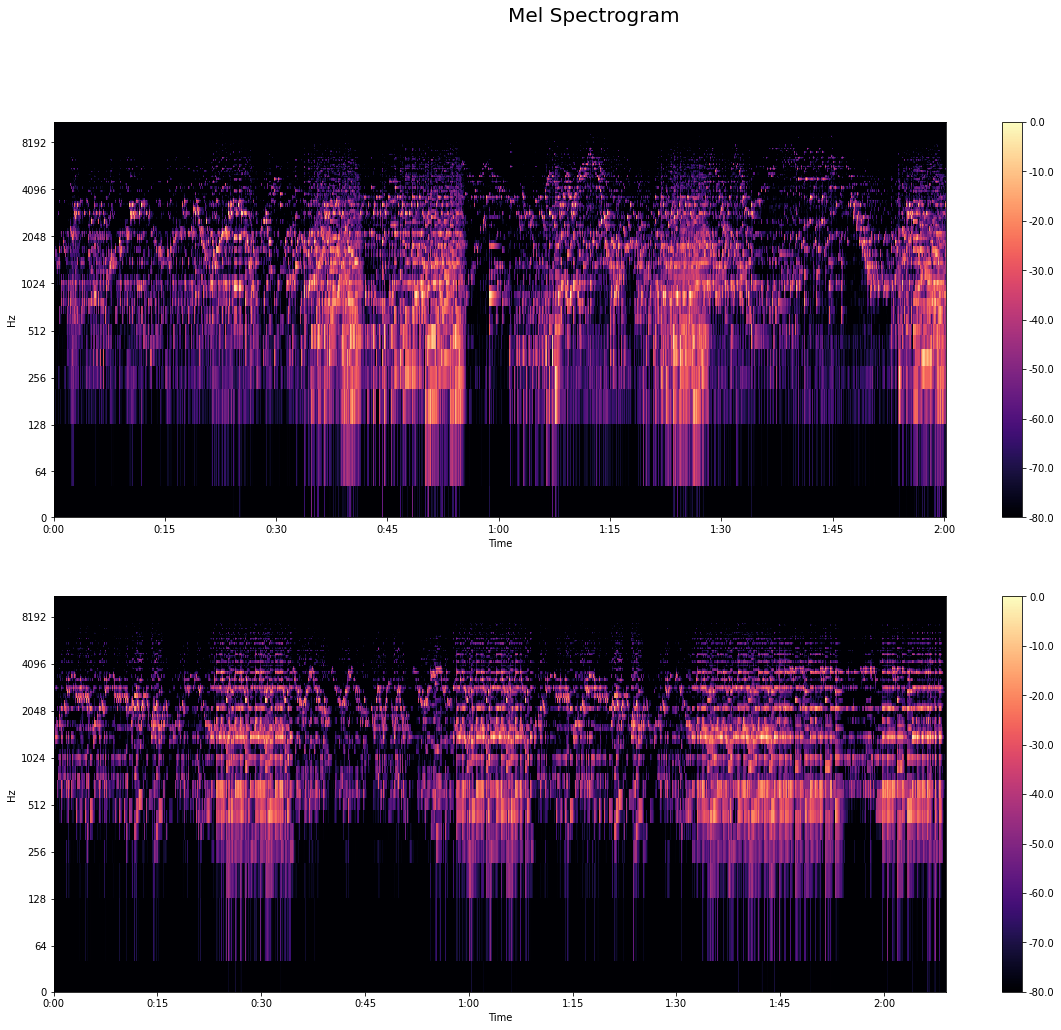

In [25]:
spectro_plot(filename1, filename2, mel=True)

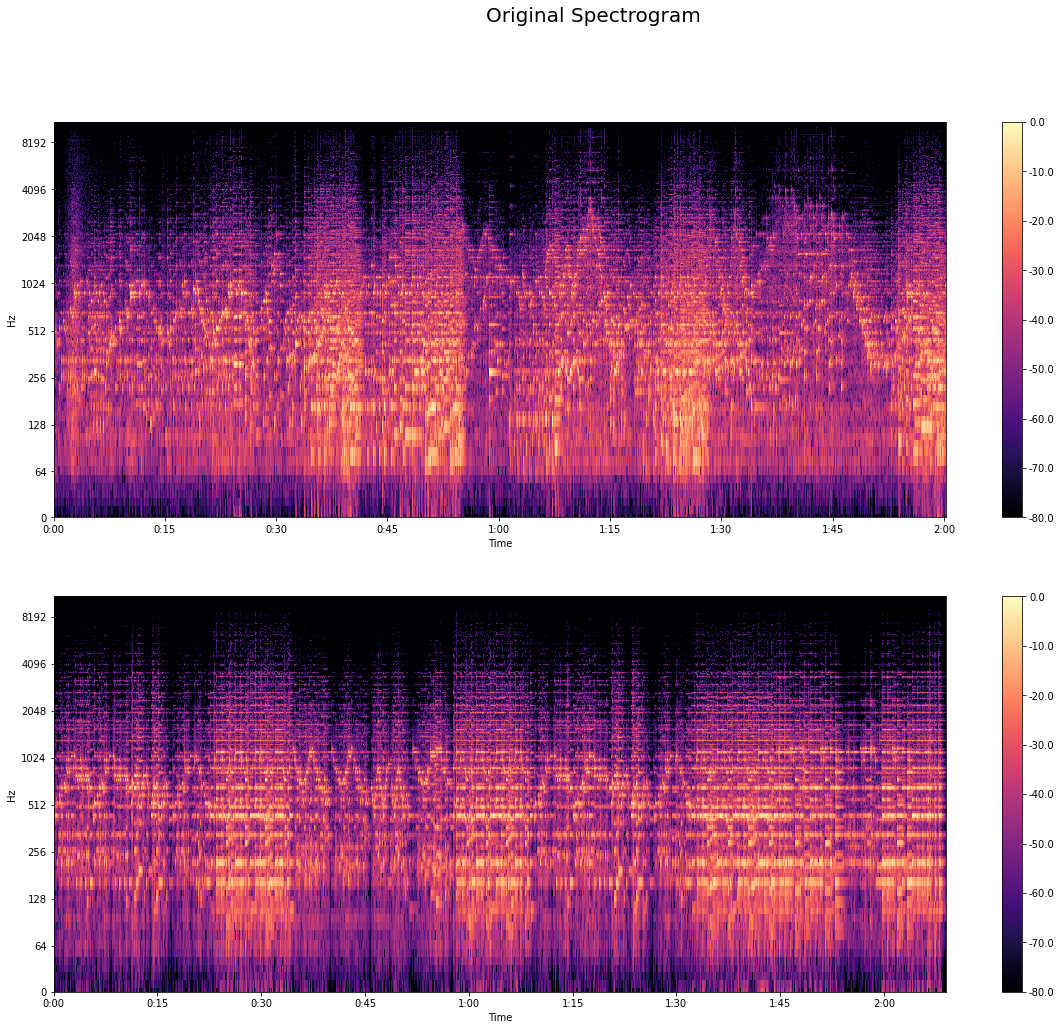

In [26]:
# Look at the orignal spectrogram

spectro_plot(filename1, filename2)

#Now look at wavelet transform. It should return something similar to STFT.

##librosa seems only have the hann wavelet, but I want to use Morlet wavelet. So switch to PyWavelets here.

In [27]:
!pip install PyWavelets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import pywt

Text(0.5, 1.0, 'Scalogram of TM_Yujia_Wang')

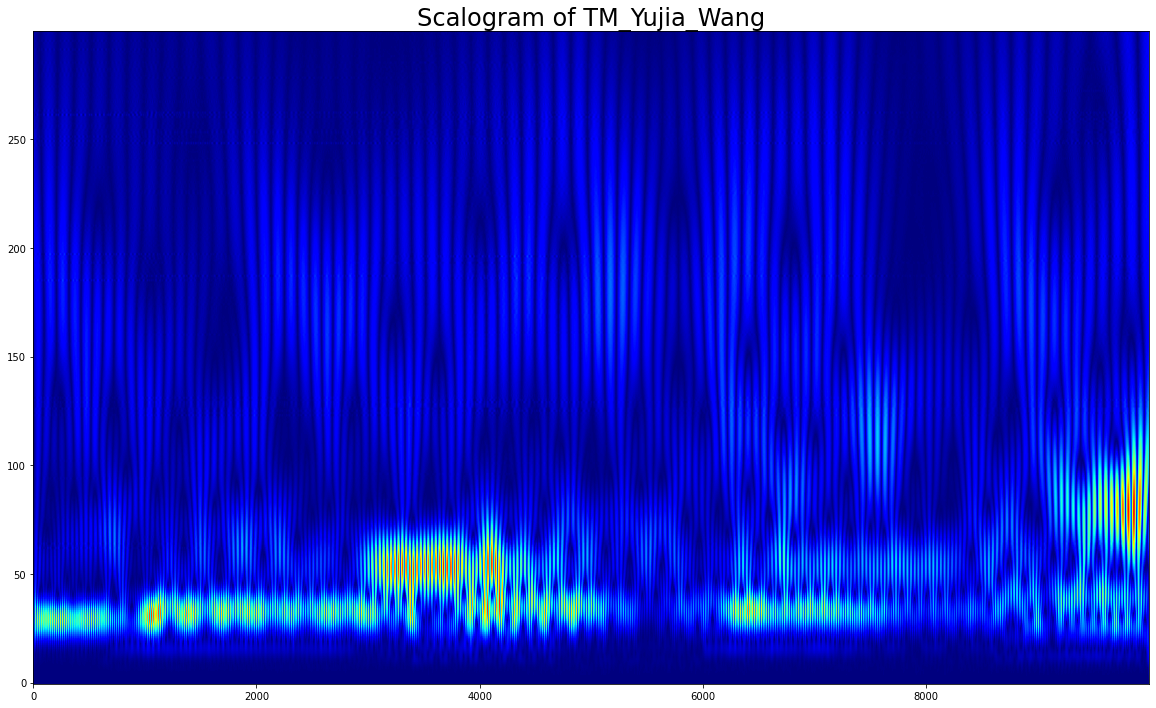

In [31]:
coefs, freqs = pywt.cwt(y1[30000:40000],np.arange(1, 301),'morl')

plt.figure(figsize=(20, 12))
plt.imshow(abs(coefs), cmap='jet', aspect='auto')
plt.gca().invert_yaxis()
plt.title(f'Scalogram of {filename1.split(".")[0]}', fontsize=24)


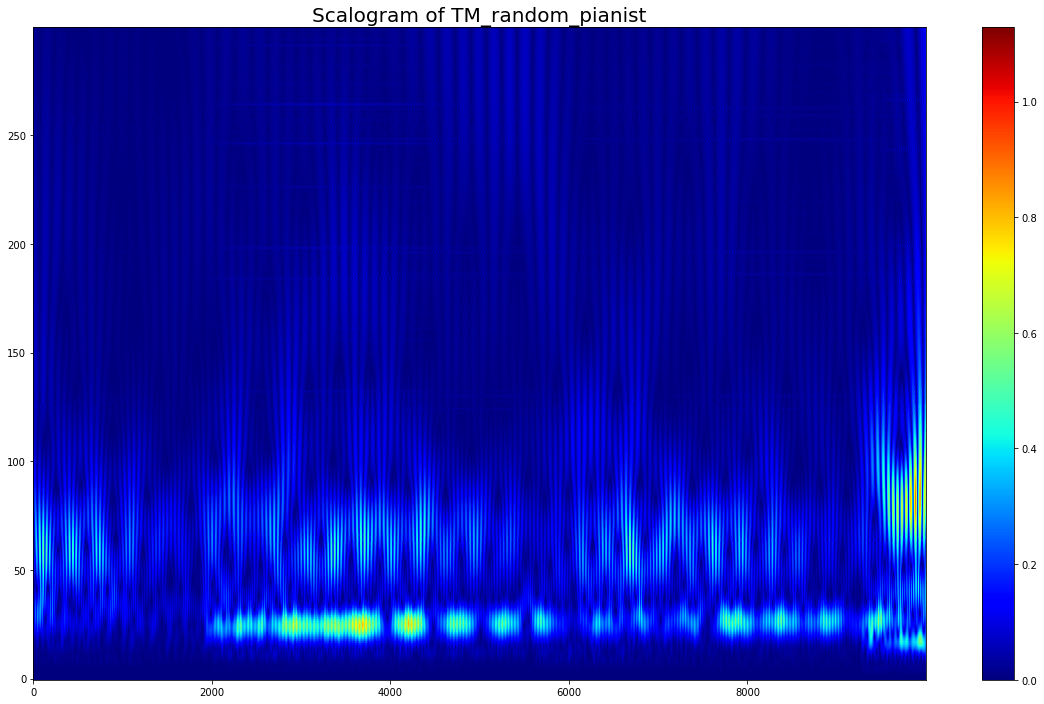

In [32]:
coefs, freqs = pywt.cwt(y2[30000:40000],np.arange(1, 301),'morl')

plt.figure(figsize=(20, 12))
plt.imshow(abs(coefs), cmap='jet', aspect='auto')
plt.colorbar()
plt.gca().invert_yaxis()
plt.title(f'Scalogram of {filename2.split(".")[0]}', fontsize=20)
plt.show()

In [35]:
# Write a function to plot them together
def plot_wt(file1, file2, scales = np.arange(1, 301), wavelet='morl'):
  '''
  Load two raw files and display the spetrogram of each audio file
  '''
  fig, ax = plt.subplots(2, 1, figsize=(20, 16))
  # plt.subplots_adjust(top=0.85)
  # fig.tight_layout()

  y1, sr1 = librosa.load(file1)
  y2, sr2 = librosa.load(file2)

  cf1, fq1 = pywt.cwt(y1[10000:40000], scales=scales, wavelet=wavelet)
  cf2, fq2 = pywt.cwt(y2[10000:40000], scales=scales, wavelet=wavelet)

  ax[0].imshow(abs(cf1), cmap='jet', aspect='auto')
  ax[0].set_title(file1.split('.')[0], fontsize=20)
  ax[0].invert_yaxis()
  ax[1].imshow(abs(cf2), cmap='jet', aspect='auto')
  ax[1].set_title(file2.split('.')[0], fontsize=20)
  ax[1].invert_yaxis()



# It crashed when I was trying to load and plot the full file, so I had to use a section of it

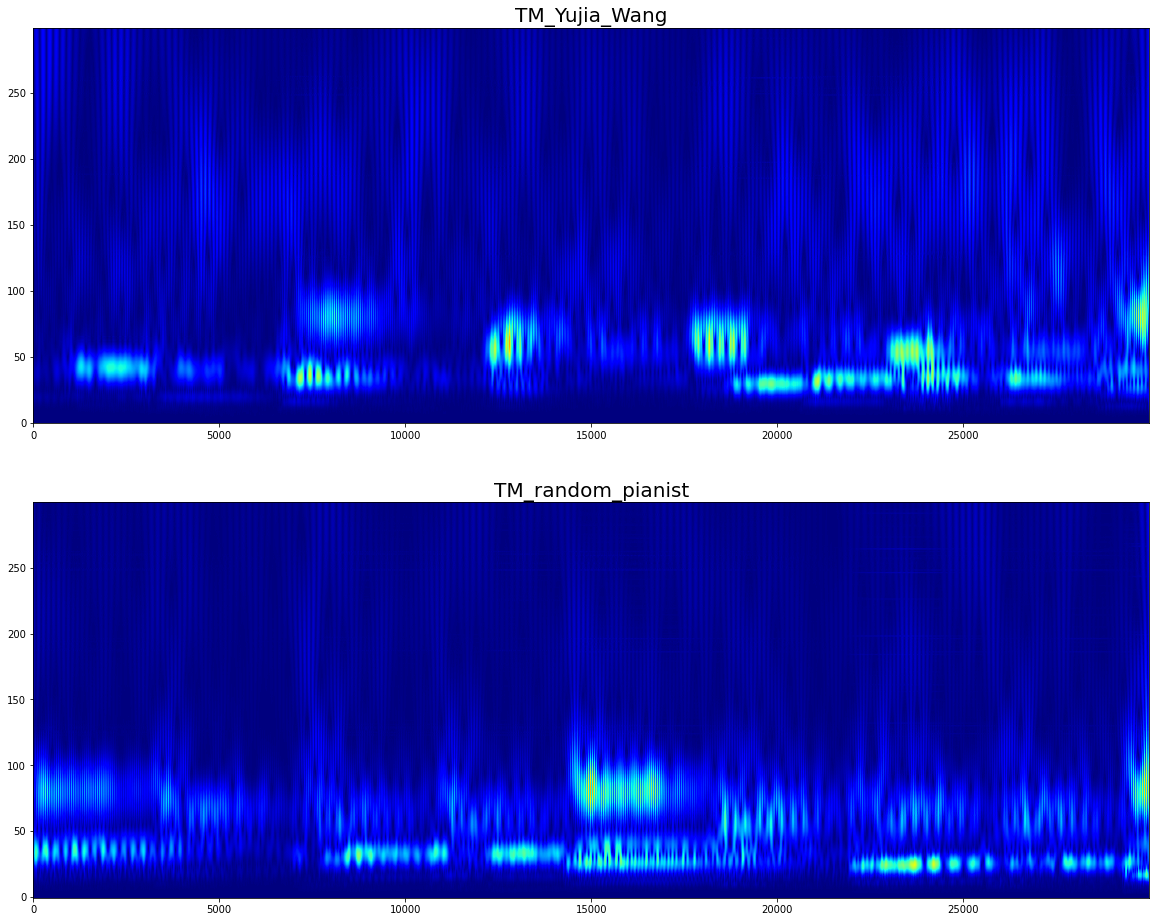

In [36]:
plot_wt(filename1, filename2)

##What is striking is the strong harmocis seen in the high-frequency range in Yujia's playing. It could be her techniques but it also could be a difference between acoustic piano and digital piano. Since she must be using a limited-edition Steinway & Sons, whereas the other pianist was using a digital piano. Even though the high-end digital pianos are pretty good nowadays, the difference is still obvious.

---



#In the future, the extracted features could be used for machine learning model training.